In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

load dataset


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

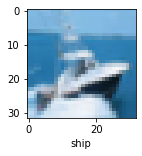

In [ ]:
plot_sample(X_train, y_train, 8)

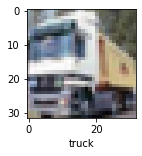

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build ANN for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 97s 61ms/step - loss: 1.8127 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6230 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5394 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4801 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4311 - accuracy: 0.4964


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      1000
           1       0.73      0.43      0.54      1000
           2       0.40      0.23      0.29      1000
           3       0.34      0.39      0.36      1000
           4       0.43      0.42      0.42      1000
           5       0.49      0.27      0.35      1000
           6       0.38      0.78      0.51      1000
           7       0.69      0.39      0.50      1000
           8       0.55      0.70      0.62      1000
           9       0.52      0.64      0.58      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



Find CNN to train images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4553 - accuracy: 0.4765
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1133 - accuracy: 0.6120
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9830 - accuracy: 0.6596
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8998 - accuracy: 0.6889
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8396 - accuracy: 0.7107
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7863 - accuracy: 0.7263
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7371 - accuracy: 0.7431
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6962 - accuracy: 0.7586
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6575 - accuracy: 0.7712
Epoch 10/10
1563/1563 [==============================] - 63s 40m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9146 - accuracy: 0.7066


[0.9146106243133545, 0.70660001039505]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.44121656e-03, 2.97623501e-06, 9.79850520e-05, 9.11446989e-01,
        1.41542012e-04, 5.70313223e-02, 2.40442040e-03, 8.38494307e-05,
        2.73477454e-02, 1.93497840e-06],
       [1.64212819e-04, 4.22532335e-02, 2.22881090e-06, 9.07559581e-07,
        7.55096835e-07, 1.38679468e-08, 3.19196158e-09, 4.78550932e-09,
        9.57560897e-01, 1.77463007e-05],
       [8.43609963e-03, 1.09192375e-02, 2.07890625e-04, 2.42965086e-03,
        3.03928304e-04, 1.38689211e-04, 7.05586135e-05, 1.98138252e-04,
        9.73568738e-01, 3.72707285e-03],
       [9.18753564e-01, 9.96999815e-03, 2.90106982e-03, 9.60939564e-04,
        5.65565750e-03, 1.71310403e-05, 1.42614779e-04, 1.25071223e-04,
        6.12700731e-02, 2.03896008e-04],
       [2.96449684e-07, 3.97751734e-08, 1.48108206e-03, 1.58339029e-03,
        3.94478291e-02, 1.08468645e-04, 9.57361281e-01, 1.20950759e-07,
        1.74981396e-05, 3.89184418e-09]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

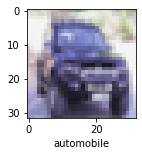

In [ ]:
plot_sample(X_test, y_test,9)

In [ ]:
classes[y_classes[2]]

'ship'

In [ ]:
cnn.save('sentiment.h5')

# New Section